In [2]:
#Code Prep for eodata dashboard
# import packages
import os 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
os.chdir('C:\\Users\\erdmann\\OneDrive - eumetsat.int\\Visual Studio\\eodata_dashboard')
os.listdir()

['eodatabase.csv', 'eodatabase.xlsx', 'eodata_dashboard.ipynb']

In [4]:
ds = pd.read_csv('eodatabase.csv')
ds

,satellite,sensor,eodata_folder,level,eum_product_name,start_date,end_date,processor,status,timeliness,baseline_collection,source,example_file
0,S3,OLCI,OL_0_EFR,0.0,NaN,17/02/2023,17/02/2023,PS1,Original,NRT,2.0,ESA,S3A_OL_0_EFR____20230217T175535_20230217T17573...
1,S3,OLCI,OL_1_EFR,1.0,NaN,25/04/2016,31/12/2017,LR2,Reprocessed,NTC,2.0,ESA,S3A_OL_1_EFR____20160425T113314_20160425T11342...
2,S3,OLCI,OL_1_EFR,1.0,NaN,01/01/2017,05/09/2022,LN1,Original,NTC,2.0,ESA,S3A_OL_1_EFR____20170101T000057_20170101T00035...
3,S3,OLCI,OL_1_EFR,1.0,NaN,06/09/2022,18/02/2023,PS1,Original,NTC,3.0,ESA,S3A_OL_1_EFR____20220907T000201_20220907T00050...
4,S3,OLCI,OL_1_EFR,1.0,NaN,31/01/2022,06/09/2022,LN1,Original,NRT,2.0,ESA,S3A_OL_1_EFR____20220201T004512_20220201T00452...
5,S3,OLCI,OL_1_EFR,1.0,NaN,07/09/2022,20/02/2023,PS1,Original,NRT,3.0,ESA,S3A_OL_1_EFR____20220909T204730_20220909T20503...
6,S3,OLCI,OL_1_EFR___,1.0,NaN,20/02/2023,today,PS1,Original,NTC,3.0,ESA,S3A_OL_1_EFR____20230219T083806_20230219T08402...
7,S3,OLCI,OL_1_EFR___,1.0,NaN,20/02/2023,today,PS1,Original,NRT,3.0,ESA,S3A_OL_1_EFR____20230220T063049_20230220T06331...
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
today = dt.date.today
ds['end_date'] = pd.to_datetime(ds['end_date'], errors='ignore')
ds['start_date'] = pd.to_datetime(ds['start_date'], errors='ignore')
ds['availability_duration'] = ds['end_date'] - ds['start_date']
ds = ds.sort_values(by='start_date')

ds['baseline_collection'] = ds['baseline_collection'].astype('str')
ds['id'] = ds['status']+'_'+ds['timeliness']+'_'+ds['baseline_collection']
#ds.loc[ds['end_date'] == 'today', 'end_date'] =today 
ds

C:\Users\erdmann\AppData\Local\Temp\ipykernel_10324\3927662171.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['end_date'] = pd.to_datetime(ds['end_date'], errors='ignore')
C:\Users\erdmann\AppData\Local\Temp\ipykernel_10324\3927662171.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['start_date'] = pd.to_datetime(ds['start_date'], errors='ignore')


,satellite,sensor,eodata_folder,level,eum_product_name,start_date,end_date,processor,status,timeliness,baseline_collection,source,example_file,availability_duration,id
1,S3,OLCI,OL_1_EFR,1.0,NaN,2016-04-25,2017-12-31 00:00:00.000000,LR2,Reprocessed,NTC,2.0,ESA,S3A_OL_1_EFR____20160425T113314_20160425T11342...,615 days 00:00:00,Reprocessed_NTC_2.0
2,S3,OLCI,OL_1_EFR,1.0,NaN,2017-01-01,2022-09-05 00:00:00.000000,LN1,Original,NTC,2.0,ESA,S3A_OL_1_EFR____20170101T000057_20170101T00035...,2073 days 00:00:00,Original_NTC_2.0
4,S3,OLCI,OL_1_EFR,1.0,NaN,2022-01-31,2022-09-06 00:00:00.000000,LN1,Original,NRT,2.0,ESA,S3A_OL_1_EFR____20220201T004512_20220201T00452...,218 days 00:00:00,Original_NRT_2.0
3,S3,OLCI,OL_1_EFR,1.0,NaN,2022-09-06,2023-02-18 00:00:00.000000,PS1,Original,NTC,3.0,ESA,S3A_OL_1_EFR____20220907T000201_20220907T00050...,165 days 00:00:00,Original_NTC_3.0
5,S3,OLCI,OL_1_EFR,1.0,NaN,2022-09-07,2023-02-20 00:00:00.000000,PS1,Original,NRT,3.0,ESA,S3A_OL_1_EFR____20220909T204730_20220909T20503...,166 days 00:00:00,Original_NRT_3.0
0,S3,OLCI,OL_0_EFR,0.0,NaN,2023-02-17,2023-02-17 00:00:00.000000,PS1,Original,NRT,2.0,ESA,S3A_OL_0_EFR____20230217T175535_20230217T17573...,0 days 00:00:00,Original_NRT_2.0
6,S3,OLCI,OL_1_EFR___,1.0,NaN,2023-02-20,2024-01-10 09:51:02.620966,PS1,Original,NTC,3.0,ESA,S3A_OL_1_EFR____20230219T083806_20230219T08402...,324 days 09:51:02.620966,Original_NTC_3.0
7,S3,OLCI,OL_1_EFR___,1.0,NaN,2023-02-20,2024-01-10 09:51:02.622231,PS1,Original,NRT,3.0,ESA,S3A_OL_1_EFR____20230220T063049_20230220T06331...,324 days 09:51:02.622231,Original_NRT_3.0
8,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,nan,NaN,NaN,NaT,NaN


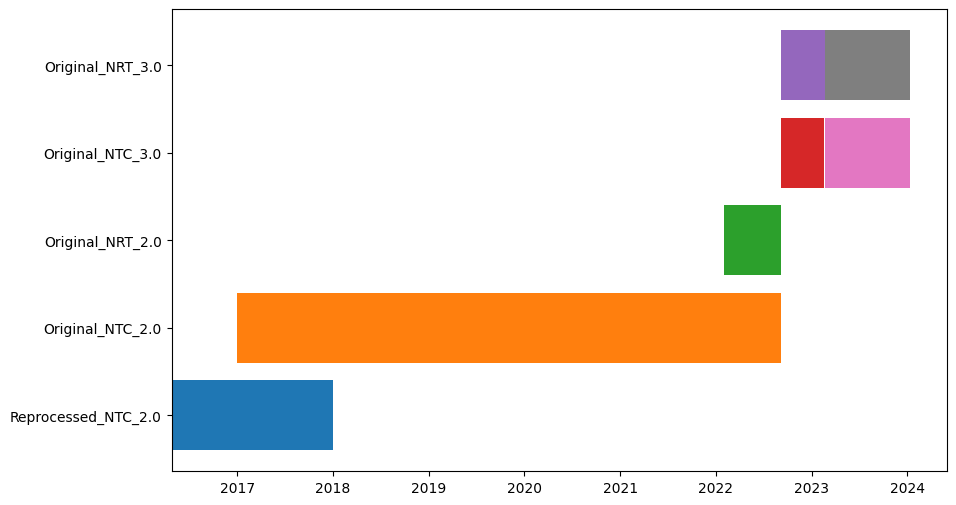

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

for index, row in ds.iterrows():
    # Plotting horizontal bars for each product
    ax.barh(row['id'], row['availability_duration'].days, left=row['start_date'], label=row['id'])


In [15]:
import os
import pandas as pd
import datetime as dt
import streamlit as st

from datetime import datetime, timedelta

#set working dir
os.chdir('C:\\Users\\erdmann\\OneDrive - eumetsat.int\\Visual Studio\\eodata_dashboard')


#data import
ds = pd.read_csv('cf_eodata_documentation.csv')

#data maipulation
today = dt.date.today
todayminusyear = dt.datetime.now()-timedelta(days=365)
todayminusmonth = dt.datetime.now()-timedelta(days=30)

ds['end_date'] = pd.to_datetime(ds['end_date'], errors='ignore')

ds.loc[ds['start_date'] == 'today - 1 year', 'start_date'] = todayminusyear
ds.loc[ds['start_date'] == 'today - 1 month', 'start_date'] = todayminusmonth

#ds.loc[ds['start_date'] == 'today - 1 year', 'start_date']
ds['start_date'] = pd.to_datetime(ds['start_date'], errors='ignore')
ds

C:\Users\erdmann\AppData\Local\Temp\ipykernel_17848\2905068373.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds['end_date'] = pd.to_datetime(ds['end_date'], errors='ignore')


,Satellite,Product type,Sensor,level,timeliness,Spatial Range,start_date,end_date,Temporal Range,Type of Access
0,Sentinel-1,GRD,SAR C-BAND,NaN,NaN,World,2023-01-10 15:09:58.574080,2024-01-10 15:09:58.575231,Last 1 Year,IAD
1,Sentinel-1,GRD-COG,SAR C-BAND,NaN,NaN,World,2014-01-10 00:00:00.000000,2024-01-10 15:09:58.575231,Oct-14 - Present,IAD
2,Sentinel-1,RTC,SAR C-BAND,NaN,NaN,World,2014-01-12 00:00:00.000000,2024-01-10 15:09:58.575231,Dec-14 - Present,IAD
3,Sentinel-1,OCN,SAR C-BAND,NaN,NaN,World,2014-01-12 00:00:00.000000,2024-01-10 15:09:58.575231,Dec-14 - Present,IAD
4,Sentinel-1,RAW,SAR C-BAND,NaN,NaN,Europe World Rest of World,2021-01-01 00:00:00.000000,2024-01-10 15:09:58.575231,Jan-21 - Present Oct-14 - Present-1 year Last ...,IAD DAD IAD
5,Sentinel-1,SLC,SAR C-BAND,NaN,NaN,World,2014-01-10 00:00:00.000000,2024-01-10 15:09:58.575231,Oct-14 - Present,IAD
6,Sentinel-2,L1C,MSI,1.0,NaN,World,2015-01-07 00:00:00.000000,2024-01-10 15:09:58.575231,Jul-15 - Present,IAD
7,Sentinel-2,L2A,MSI,2.0,NaN,World,2015-01-07 00:00:00.000000,2024-01-10 15:09:58.575231,Jul-15 - Present,IAD
8,Sentinel-3,OLCI Level-1 NTC,OLCI,1.0,NTC,World,2016-01-03 00:00:00.000000,2024-01-10 15:09:58.575231,Mar-16 - Present,IAD
9,Sentinel-3,OLCI Level-1 NRT,OLCI,1.0,NRT,World,2023-01-10 15:09:58.574080,2024-01-10 15:09:58.575231,Last 1 year,IAD


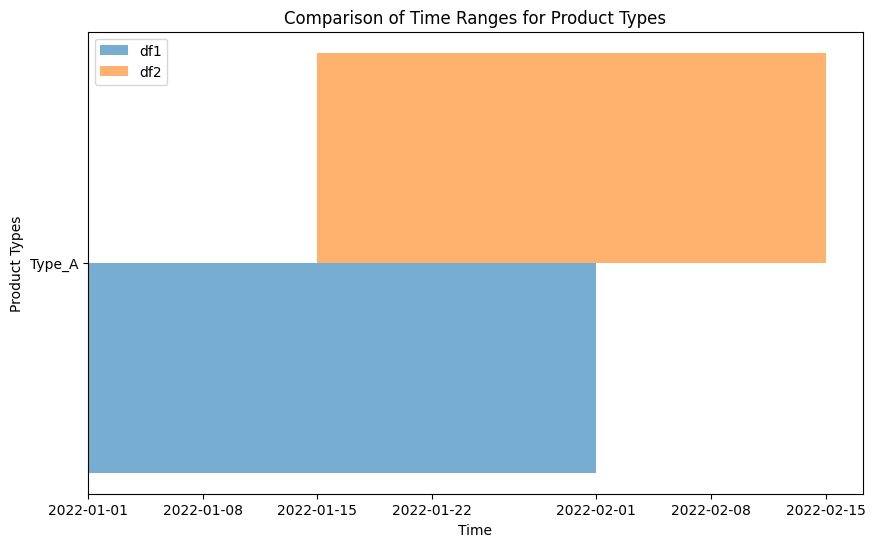

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrames
data1 = {
    'Product type': ['Type_A', 'Type_B', 'Type_C'],
    'start_date': ['2022-01-01', '2022-02-01', '2022-03-01'],
    'end_date': ['2022-02-01', '2022-03-01', '2022-04-01'],
}

data2 = {
    'Product type': ['Type_A', 'Type_B', 'Type_C'],
    'start_date': ['2022-01-15', '2022-02-15', '2022-03-15'],
    'end_date': ['2022-02-15', '2022-03-15', '2022-04-15'],
}

df1 = pd.DataFrame(data1)
df1['end_date'] = pd.to_datetime(df1['end_date'], errors='ignore')
df1['start_date'] = pd.to_datetime(df1['start_date'], errors='ignore')
df2 = pd.DataFrame(data2)
df2['end_date'] = pd.to_datetime(df2['end_date'], errors='ignore')
df2['start_date'] = pd.to_datetime(df2['start_date'], errors='ignore')
# Assuming you have select_instrument, select_timeliness, and select_level defined
select_instrument = ['Type_A']

# Filter DataFrames based on selected criteria
filtered_df1 = df1[(df1['Product type'].isin(select_instrument))]
filtered_df2 = df2[(df2['Product type'].isin(select_instrument))]

# Plotting the time ranges from both DataFrames
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of each bar
bar_positions_df1 = np.arange(len(filtered_df1))
bar_positions_df2 = bar_positions_df1 + bar_width

# Plotting bars for df1
ax.barh(bar_positions_df1, (filtered_df1['end_date'] - filtered_df1['start_date']).dt.days,
        height=bar_width, left=filtered_df1['start_date'], label='df1', alpha=0.6)

# Plotting bars for df2
ax.barh(bar_positions_df2, (filtered_df2['end_date'] - filtered_df2['start_date']).dt.days,
        height=bar_width, left=filtered_df2['start_date'], label='df2', alpha=0.6)

# Beautify the plot
ax.set_yticks((bar_positions_df1 + bar_positions_df2) / 2)
ax.set_yticklabels(filtered_df1['Product type'])
ax.set_xlabel('Time')
ax.set_ylabel('Product Types')
ax.set_title('Comparison of Time Ranges for Product Types')
ax.legend()

# Display the plot
plt.show()



TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

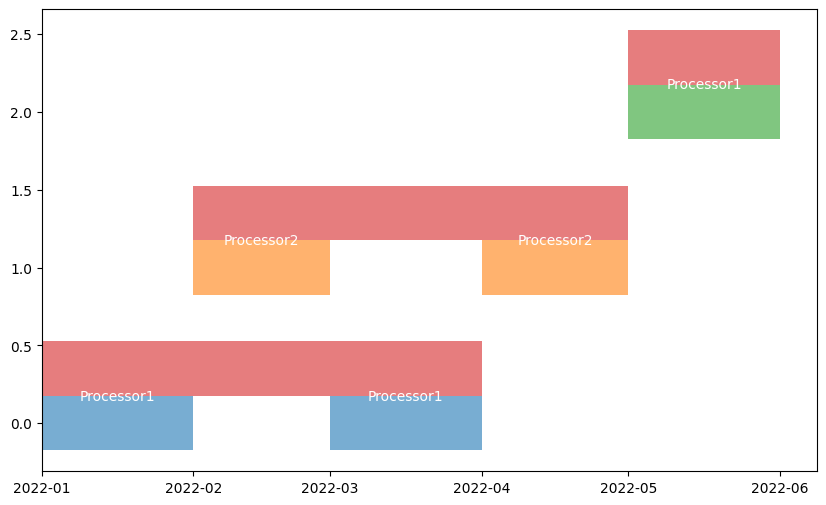

In [32]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrames
data = {
    'Product type': ['Type_A', 'Type_B', 'Type_A', 'Type_B', 'Type_C'],
    'start_date': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01'],
    'end_date': ['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01'],
    'specs': ['Processor1', 'Processor2', 'Processor1', 'Processor2', 'Processor1'],
}

df = pd.DataFrame(data)

df['end_date'] = pd.to_datetime(df['end_date'], errors='ignore')
df['start_date'] = pd.to_datetime(df['start_date'], errors='ignore')

# Group by Product type and calculate the complete time range
grouped_df1 = df.groupby('Product type').agg({
    'start_date': 'min',
    'end_date': 'max',
    'specs': 'first'  # Choose the first value of specs for labeling
}).reset_index()

# Plotting the time ranges
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of each bar

bar_positions = np.arange(len(grouped_df1))

# Plotting bars for each spec within each product type
for i, product_type in enumerate(grouped_df1['Product type']):
    product_type_data = df[df['Product type'] == product_type]
    unique_specs = product_type_data['specs'].unique()

    for j, spec in enumerate(unique_specs):
        spec_data = product_type_data[product_type_data['specs'] == spec]
        # Convert start_date and end_date to the number of days since a reference date
        start_date_numeric = (spec_data['start_date'] - pd.Timestamp("1970-01-01")).dt.days.values
        end_date_numeric = (spec_data['end_date'] - pd.Timestamp("1970-01-01")).dt.days.values
        ax.barh(bar_positions[i] + j * bar_width,
                end_date_numeric - start_date_numeric,
                height=bar_width, left=start_date_numeric,
                label=f'{product_type} - {spec}', alpha=0.6)

        # Add label for each bar
        for index, value in enumerate(spec_data['specs']):
            ax.text((start_date_numeric[index] + end_date_numeric[index]) / 2,
                    bar_positions[i] + j * bar_width + bar_width / 2,
                    value, ha='center', va='center', color='white')

# Plotting bars for complete time range at the top
ax.barh(bar_positions + len(unique_specs) * bar_width,
        (grouped_df1['end_date'] - grouped_df1['start_date']).dt.days,
        height=bar_width, left=grouped_df1['start_date'], label='Complete Time Range', alpha=0.6)


# Beautify the plot
ax.set_yticks(bar_positions + (len(unique_specs) - 1) * bar_width / 2)
ax.set_yticklabels(grouped_df1['Product type'].tolist() + ['Complete Time Range'])
ax.set_xlabel('Time')
ax.set_ylabel('Product Types')
ax.set_title('Product Type Time Range with Specs')
ax.legend()



In [39]:
import pandas as pd

# Sample DataFrame
data = {'Product': ['A', 'B', 'A', 'B', 'C', 'D'],
        'Start_Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02', '2022-01-03', '2022-01-04'],
        'End_Date': ['2022-01-05', '2022-01-05', '2022-01-06', '2022-01-06', '2022-01-08', '2022-01-10'],
        'Type': ['Reprocessed', 'NTC', 'Reprocessed', 'NRT', 'NTC', 'Reprocessed'],
        'BC': [2, 2, 3, 2, 3, 4]}

df = pd.DataFrame(data)
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Sort the DataFrame based on conditions
best_products_df = df.sort_values(by=['Type', 'BC'], ascending=[False, False])

print (best_products_df)

# Initialize the adjusted DataFrame
adjusted_df = pd.DataFrame(columns=['Product', 'Start_Date', 'End_Date', 'Type', 'BC'])
start_date = best_products_df['Start_Date'].min()
end_date = best_products_df['End_Date'].max()
current_date = start_date
while current_date <= end_date:
    for index, row in best_products_df.iterrows():
        start_date_row = row['Start_Date']
        end_date_row = row['End_Date']
        if start_date_row == current_date:
            adjusted_df = pd.concat([adjusted_df, pd.DataFrame([{'Product': row['Product'], 'Start_Date': current_date, 'End_Date': 'placeholder', 'Type': row['Type'], 'BC': row['BC']}])], ignore_index=True)
            print (len(adjusted_df))
            print (adjusted_df)
            if len(adjusted_df) > 1:
                adjusted_df['End_Date'].loc[len(adjusted_df)-2] = current_date
            current_date+= pd.Timedelta(days=1)
    # Move to the next day
    current_date += pd.Timedelta(days=1)
    if current_date == end_date:
        adjusted_df['End_Date'].loc[len(adjusted_df)-1] = current_date
# Display the resulting DataFrame
print(adjusted_df)


  Product Start_Date   End_Date         Type  BC
5       D 2022-01-04 2022-01-10  Reprocessed   4
2       A 2022-01-02 2022-01-06  Reprocessed   3
0       A 2022-01-01 2022-01-05  Reprocessed   2
4       C 2022-01-03 2022-01-08          NTC   3
1       B 2022-01-01 2022-01-05          NTC   2
3       B 2022-01-02 2022-01-06          NRT   2
1
  Product Start_Date     End_Date         Type BC
0       A 2022-01-01  placeholder  Reprocessed  2
2
  Product Start_Date     End_Date         Type BC
0       A 2022-01-01  placeholder  Reprocessed  2
1       B 2022-01-02  placeholder          NRT  2
3
  Product Start_Date             End_Date         Type BC
0       A 2022-01-01  2022-01-02 00:00:00  Reprocessed  2
1       B 2022-01-02          placeholder          NRT  2
2       D 2022-01-04          placeholder  Reprocessed  4
  Product Start_Date             End_Date         Type BC
0       A 2022-01-01  2022-01-02 00:00:00  Reprocessed  2
1       B 2022-01-02  2022-01-04 00:00:00          NR

C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\1698006365.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adjusted_df = pd.concat([adjusted_df, pd.DataFrame([{'Product': row['Product'], 'Start_Date': current_date, 'End_Date': 'placeholder', 'Type': row['Type'], 'BC': row['BC']}])], ignore_index=True)
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\1698006365.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_df['End_Date'].loc[len(adjusted_df)-2] = current_date
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\1698006365.py:33: Se

In [60]:
import os 
import pandas as pd
import datetime as dt
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from matplotlib.lines import Line2D



# Custom function to format integers with leading zeros
def format_with_zeros(value):
    return f"{value:03d}"


# import the EUM data available

ds_eum = pd.read_csv('./data/eum_s3_data.csv')
ds_eum = ds_eum.dropna( axis=0, how='all')

#data maipulation
today = dt.date.today
todayminusyear = dt.datetime.now()-timedelta(days=365)
todayminusmonth = dt.datetime.now()-timedelta(days=30)
ds_eum.loc[ds_eum['end_date'] == 'today - 1 year', 'end_date'] = todayminusyear
ds_eum.loc[ds_eum['end_date'] == 'today - 1 month', 'end_date'] = todayminusmonth
ds_eum['end_date'] = pd.to_datetime(ds_eum['end_date'], errors='ignore')
ds_eum['start_date'] = pd.to_datetime(ds_eum['start_date'], errors='ignore')
ds_eum['availability_duration'] = ds_eum['end_date'] - ds_eum['start_date']
ds_eum = ds_eum.sort_values(by='start_date')
ds_eum['baseline_collection'] = ds_eum['baseline_collection'].apply(format_with_zeros)
ds_eum['processing'] =np.where(ds_eum['status'] == 'Original', ds_eum['timeliness'] , ds_eum['status'])


ds_eum_group =ds_eum.groupby(['product', 'processing', 'baseline_collection']).agg({
    'start_date': 'min',
    'end_date': 'max'
}).reset_index().sort_values(['product'], ascending = True)

# create dataframe with EUM recommendation

# Sort the DataFrame based on conditions
best_products_df_sort = ds_eum[['product', 'processing', 'baseline_collection', 'start_date', 'end_date']].sort_values(by=['product', 'processing', 'baseline_collection'], ascending=[False, False, False])

#print (best_products_df_sort)

best_products_df_sort = best_products_df_sort[best_products_df_sort['product'] == 'OL_1_EFR']
print(best_products_df_sort)
# Initialize the adjusted DataFrame
eum_recomm_data = pd.DataFrame(columns=['product', 'start_date', 'end_date', 'processing', 'baseline_collection'])
start_date = best_products_df_sort['start_date'].min()
end_date = best_products_df_sort['end_date'].max()
for product in best_products_df_sort['product'].unique():
    best_products_df = best_products_df_sort[best_products_df_sort['product'] == product]
    adjusted_df = pd.DataFrame(columns=['product', 'start_date', 'end_date', 'processing', 'baseline_collection'])
    current_date = start_date
    while current_date <= end_date:
        for index, row in best_products_df.iterrows():
            start_date_row = row['start_date']
            end_date_row = row['end_date']
            if start_date_row == current_date:
                if (best_products_df.head(index)['start_date'].min()>start_date_row )& (best_products_df.head(index)['start_date'].min()<end_date_row):#start date of smaller index > end date row: end date = start_date of smaller index
                    end_date_product = (best_products_df.head(index)['start_date'].min())
                else: 
                    end_date_product = end_date_row #end date==end_date row
                    
                adjusted_df = pd.concat([adjusted_df, pd.DataFrame([{'Product': row['product'], 'start_date': current_date, 'end_date': 'placeholder', 'processing': row['processing'], 'baseline_collection': row['baseline_collection']}])], ignore_index=True)
                if len(adjusted_df) > 1:
                    adjusted_df['end_date'].loc[len(adjusted_df)-2] = current_date
                last_product = row['product']
                break
        # Move to the next day
        current_date += pd.Timedelta(days=1)
        if current_date == end_date:
            adjusted_df['end_date'].loc[len(adjusted_df)-1] = end_date
    eum_recomm_data = pd.concat([eum_recomm_data, adjusted_df])

    print (eum_recomm_data)

C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\30329356.py:28: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds_eum['end_date'] = pd.to_datetime(ds_eum['end_date'], errors='ignore')
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\30329356.py:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds_eum['start_date'] = pd.to_datetime(ds_eum['start_date'], errors='ignore')
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\30329356.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adjusted_df = pd.concat(

     product   processing baseline_collection start_date  \
13  OL_1_EFR  Reprocessed                 002 2016-04-25   
10  OL_1_EFR          NTC                 002 2016-04-25   
0   OL_1_EFR          NRT                 002 2016-10-20   

                     end_date  
13 2019-10-29 00:00:00.000000  
10 2023-12-24 16:26:39.976578  
0  2024-01-23 16:26:39.977575  
  product start_date             end_date   processing baseline_collection  \
0     NaN 2016-04-25  2016-10-20 00:00:00  Reprocessed                 002   
1     NaN 2016-10-20          placeholder          NRT                 002   

    Product  
0  OL_1_EFR  
1  OL_1_EFR  


C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\30329356.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eum_recomm_data = pd.concat([eum_recomm_data, adjusted_df])


In [69]:
import os 
import pandas as pd
import datetime as dt
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from matplotlib.lines import Line2D



# Custom function to format integers with leading zeros
def format_with_zeros(value):
    return f"{value:03d}"


# import the EUM data available

ds_eum = pd.read_csv('./data/eum_s3_data.csv')
ds_eum = ds_eum.dropna( axis=0, how='all')

#data maipulation
today = dt.date.today
todayminusyear = dt.datetime.now()-timedelta(days=365)
todayminusmonth = dt.datetime.now()-timedelta(days=30)
ds_eum.loc[ds_eum['end_date'] == 'today - 1 year', 'end_date'] = todayminusyear
ds_eum.loc[ds_eum['end_date'] == 'today - 1 month', 'end_date'] = todayminusmonth
ds_eum['end_date'] = pd.to_datetime(ds_eum['end_date'], errors='ignore')
ds_eum['start_date'] = pd.to_datetime(ds_eum['start_date'], errors='ignore')
ds_eum['availability_duration'] = ds_eum['end_date'] - ds_eum['start_date']
ds_eum = ds_eum.sort_values(by='start_date')
ds_eum['baseline_collection'] = ds_eum['baseline_collection'].apply(format_with_zeros)
ds_eum['processing'] =np.where(ds_eum['status'] == 'Original', ds_eum['timeliness'] , ds_eum['status'])


ds_eum_group =ds_eum.groupby(['product', 'processing', 'baseline_collection']).agg({
    'start_date': 'min',
    'end_date': 'max'
}).reset_index().sort_values(['product'], ascending = True)

# create dataframe with EUM recommendation

# Sort the DataFrame based on conditions
best_products_df_sort = ds_eum[['product', 'processing', 'baseline_collection', 'start_date', 'end_date']].sort_values(
                            by=['product', 'processing', 'baseline_collection'], ascending=[False, False, False])

#print (best_products_df_sort)

#best_products_df_sort = best_products_df_sort[best_products_df_sort['product'] == 'OL_1_EFR']
#print(best_products_df_sort)
# Initialize the adjusted DataFrame
eum_recomm_data = pd.DataFrame(columns=['product', 'start_date', 'end_date', 'processing', 'baseline_collection'])
start_date = best_products_df_sort['start_date'].min()
end_date = best_products_df_sort['end_date'].max()
for product in best_products_df_sort['product'].unique():
    best_products_df = best_products_df_sort[best_products_df_sort['product'] == product].reset_index()
    adjusted_df = pd.DataFrame(columns=['product', 'start_date', 'end_date', 'processing', 'baseline_collection'])
    current_date = start_date
    while current_date <= end_date:
        for index, row in best_products_df.iterrows():
            #print (index)
            start_date_row = row['start_date']
            end_date_row = row['end_date']
            if start_date_row == current_date:
                if (best_products_df.head(index)['start_date'].min()>start_date_row )& (best_products_df.head(index)['start_date'].min()<end_date_row):#start date of smaller index > end date row: end date = start_date of smaller index
                    end_date_product = (best_products_df.head(index)['start_date'].min())-pd.Timedelta(days=1)
                    #current_date = end_date_product
                else: 
                    end_date_product = end_date_row #end date==end_date row
                    #current_date = end_date_product-pd.Timedelta(days=1)
                adjusted_df = pd.concat([adjusted_df, pd.DataFrame([{'Product': row['product'], 'start_date': current_date, 'end_date': end_date_product, 'processing': row['processing'], 'baseline_collection': row['baseline_collection']}])], ignore_index=True)
                current_date = end_date_product
                break
            if (current_date > start_date_row)&(current_date < end_date_row):
                if (best_products_df.head(index)['start_date'].min()>start_date_row )& (best_products_df.head(index)['start_date'].min()<end_date_row):#start date of smaller index > end date row: end date = start_date of smaller index
                    end_date_product = (best_products_df.head(index)['start_date'].min())-pd.Timedelta(days=1)
                    #current_date = end_date_product
                else: 
                    end_date_product = end_date_row #end date==end_date row
                    #current_date = end_date_product-pd.Timedelta(days=1)
                adjusted_df = pd.concat([adjusted_df, pd.DataFrame([{'Product': row['product'], 'start_date': current_date, 'end_date': end_date_product, 'processing': row['processing'], 'baseline_collection': row['baseline_collection']}])], ignore_index=True)
                current_date = end_date_product
                break
                
                # if len(adjusted_df) > 1:
                #     adjusted_df['end_date'].loc[len(adjusted_df)-2] = current_date
                # last_product = row['product']
            

        # Move to the next day
        current_date += pd.Timedelta(days=1)
    eum_recomm_data = pd.concat([eum_recomm_data, adjusted_df])

    print (eum_recomm_data)

  product                 start_date                   end_date   processing  \
0     NaN 2016-04-25 00:00:00.000000 2021-04-28 00:00:00.000000  Reprocessed   
1     NaN 2021-04-29 00:00:00.000000 2023-12-24 17:18:47.814481          NTC   
2     NaN 2023-12-25 17:18:47.814481 2024-01-23 17:18:47.818768          NRT   

  baseline_collection   Product  
0                 003  OL_2_WRR  
1                 003  OL_2_WRR  
2                 003  OL_2_WRR  
  product                 start_date                   end_date   processing  \
0     NaN 2016-04-25 00:00:00.000000 2021-04-28 00:00:00.000000  Reprocessed   
1     NaN 2021-04-29 00:00:00.000000 2023-12-24 17:18:47.814481          NTC   
2     NaN 2023-12-25 17:18:47.814481 2024-01-23 17:18:47.818768          NRT   
0     NaN 2016-04-24 00:00:00.000000 2021-04-28 00:00:00.000000  Reprocessed   
1     NaN 2021-04-29 00:00:00.000000 2023-12-24 17:18:47.814481          NTC   
2     NaN 2023-12-25 17:18:47.814481 2024-01-23 17:18:47.818768

C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\3817228085.py:28: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds_eum['end_date'] = pd.to_datetime(ds_eum['end_date'], errors='ignore')
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\3817228085.py:29: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds_eum['start_date'] = pd.to_datetime(ds_eum['start_date'], errors='ignore')
C:\Users\erdmann\AppData\Local\Temp\ipykernel_12796\3817228085.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adjusted_df = pd.c